In [18]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing
import re
import string


# Train Test Split + ML Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# Evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("C:\\Users\\anshi\\Downloads\\CEAS_08.csv\\CEAS_08.csv")

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)




Dataset Shape: (39154, 7)
Number of Rows: 39154
Number of Columns: 7

First 5 rows:
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                              

In [20]:
print("STEP 2: DATA OVERVIEW")
print("="*60)

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

print("\nBasic Statistics:")
print(df.describe())

STEP 2: DATA OVERVIEW

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None

Missing Values:
sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

Missing Values Percentage:
sender      0.000000
receiver    1.179956
date        0.000000
subject     0.071512
body        0.000000
label       0.000000
urls        0.000000
dtype: float64

Basic Statistics:
              label         urls
count  39154.000000  39154.00000
mean       0.557848      0.66997
std     


STEP 3: EXPLORATORY DATA ANALYSIS

--- Class Distribution ---
label
1    21842
0    17312
Name: count, dtype: int64

Class Distribution (Percentage):
label
1    55.78485
0    44.21515
Name: proportion, dtype: float64


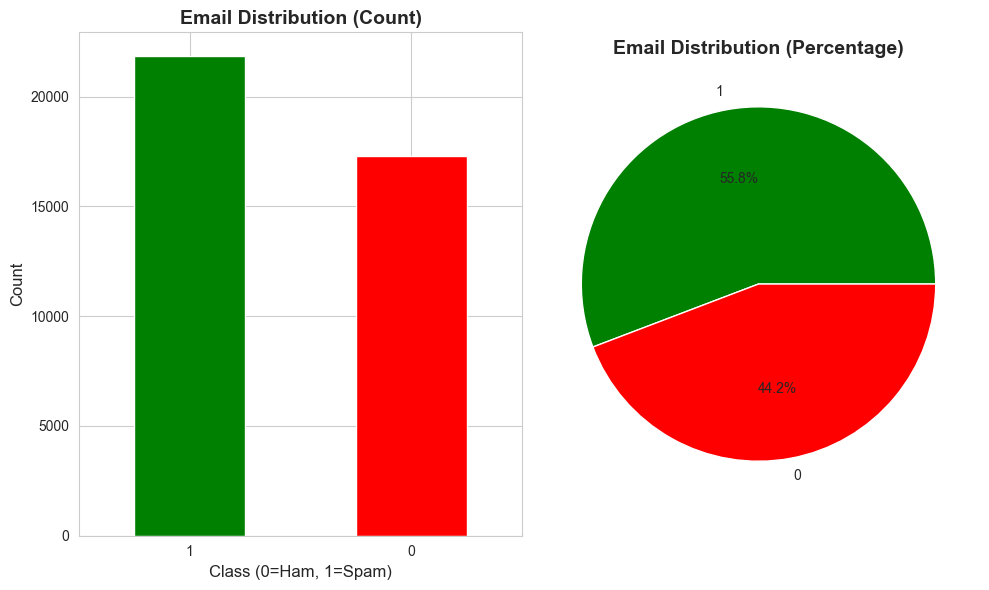

In [21]:
print("\n" + "="*60)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*60)

# Class Distribution
print("\n--- Class Distribution ---")
print(df['label'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['label'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Email Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Class (0=Ham, 1=Spam)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Email Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
print("\n--- Feature Engineering ---")

# Text length features
df['subject_length'] = df['subject'].fillna('').astype(str).apply(len)
df['body_length'] = df['body'].fillna('').astype(str).apply(len)
df['subject_word_count'] = df['subject'].fillna('').astype(str).apply(lambda x: len(x.split()))
df['body_word_count'] = df['body'].fillna('').astype(str).apply(lambda x: len(x.split()))

# URL count
df['url_count'] = df['urls'].fillna('').astype(str).apply(lambda x: len(x.split()))

# Combined text
df['combined_text'] = df['subject'].fillna('').astype(str) + ' ' + df['body'].fillna('').astype(str)

# Special characters count
df['exclamation_count'] = df['combined_text'].apply(lambda x: x.count('!'))
df['question_count'] = df['combined_text'].apply(lambda x: x.count('?'))
df['capital_count'] = df['combined_text'].apply(lambda x: sum(1 for c in x if c.isupper()))

print("New features created:")
print(df[['subject_length', 'body_length', 'url_count', 'exclamation_count']].head())

# Statistical comparison between Spam and Ham
print("\n--- Statistical Comparison: Spam vs Ham ---")
print("\nAverage Subject Length:")
print(df.groupby('label')['subject_length'].mean())

print("\nAverage Body Length:")
print(df.groupby('label')['body_length'].mean())

print("\nAverage URL Count:")
print(df.groupby('label')['url_count'].mean())

print("\nAverage Exclamation Marks:")
print(df.groupby('label')['exclamation_count'].mean())




--- Feature Engineering ---
New features created:
   subject_length  body_length  url_count  exclamation_count
0              25          273          1                  2
1              22           82          1                  0
2              20         3918          1                  0
3             150        24418          1                  4
4              26          175          1                  0

--- Statistical Comparison: Spam vs Ham ---

Average Subject Length:
label
0    48.084277
1    31.614321
Name: subject_length, dtype: float64

Average Body Length:
label
0    2542.186287
1     801.379452
Name: body_length, dtype: float64

Average URL Count:
label
0    1.0
1    1.0
Name: url_count, dtype: float64

Average Exclamation Marks:
label
0    1.111483
1    0.908754
Name: exclamation_count, dtype: float64


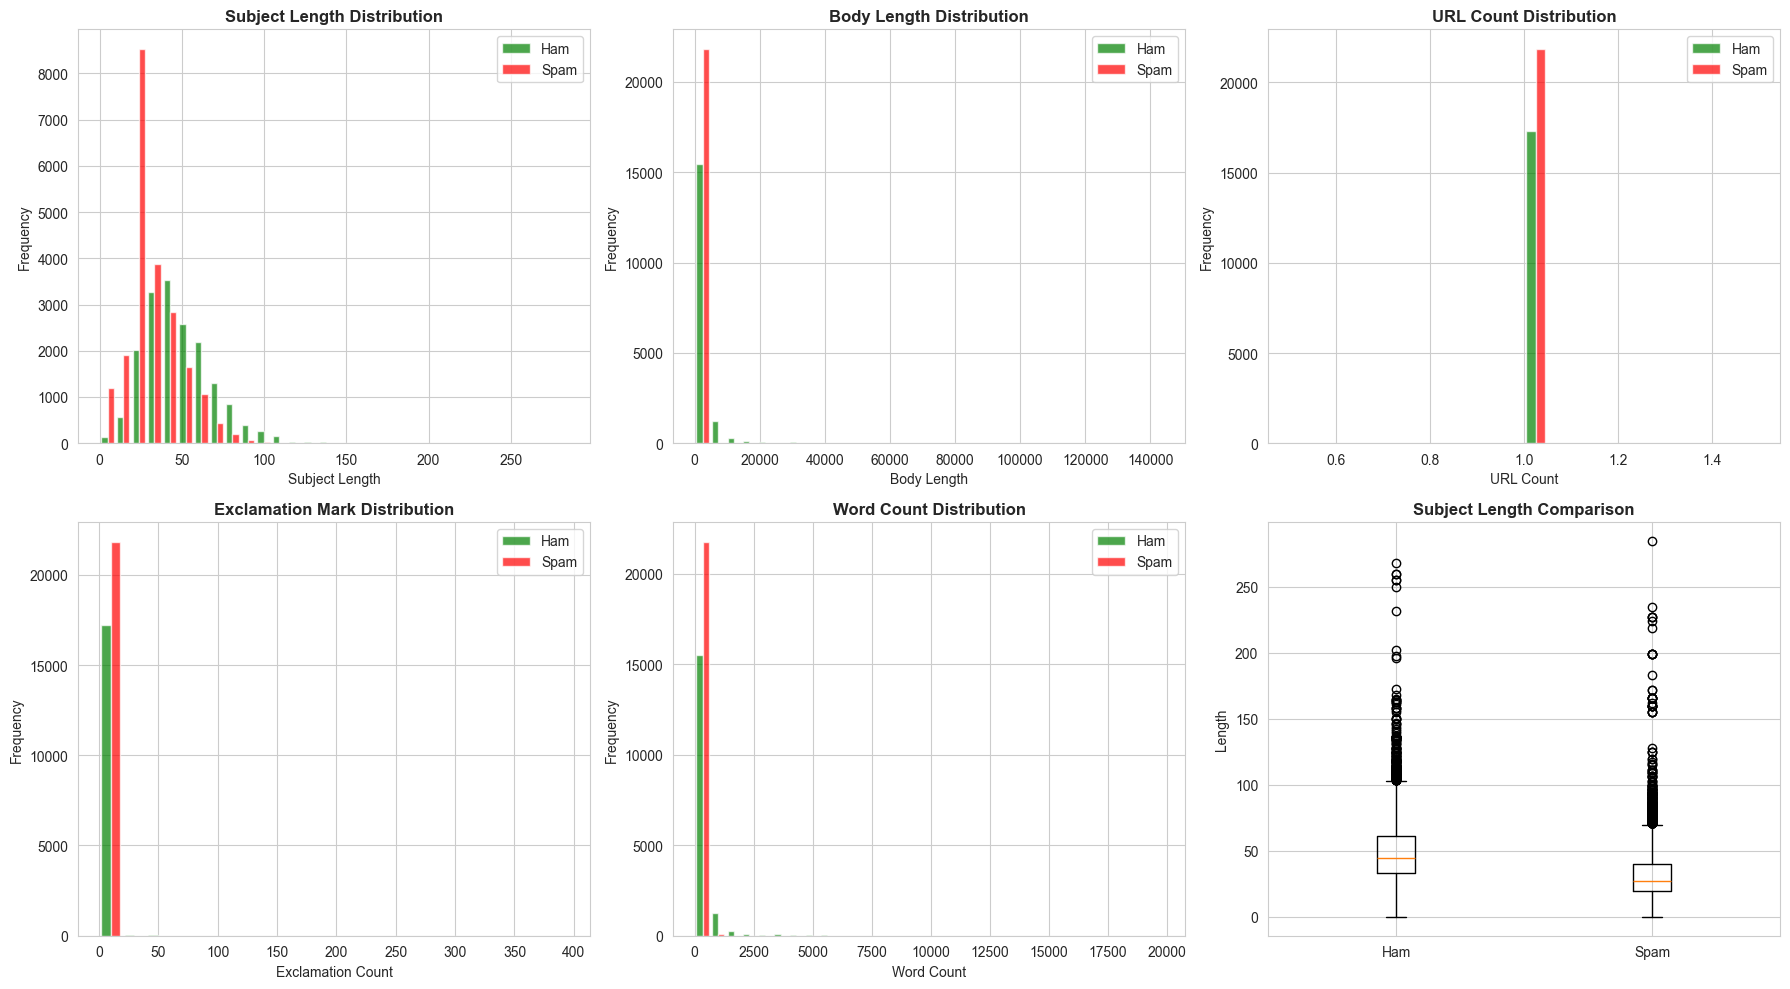


--- Feature Correlations ---


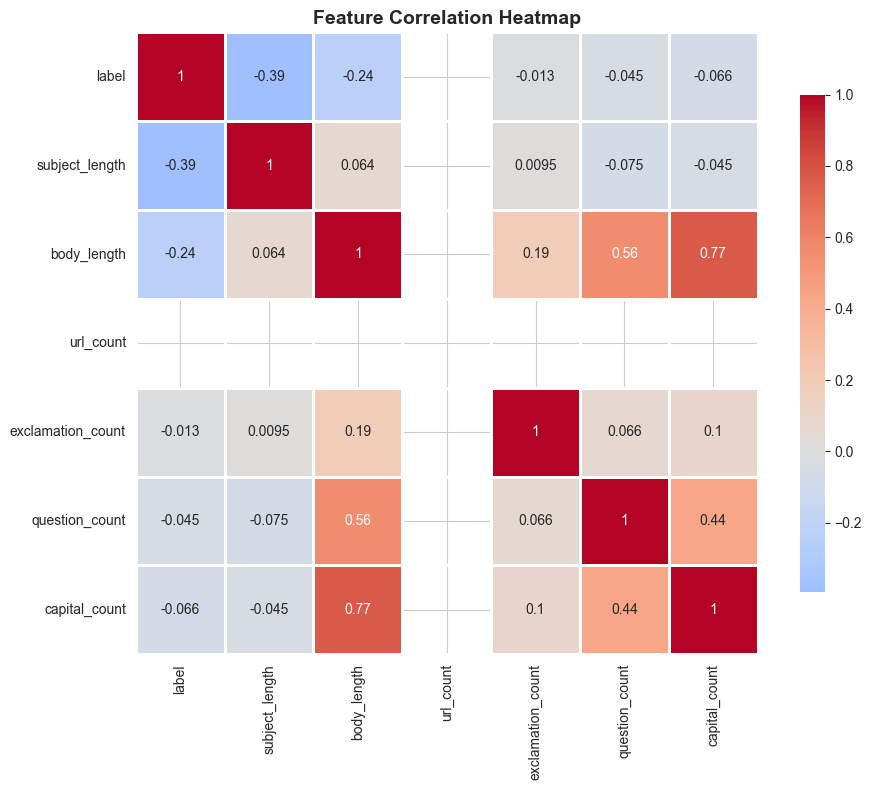

In [23]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Subject Length
axes[0, 0].hist([df[df['label']==0]['subject_length'], df[df['label']==1]['subject_length']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Subject Length Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Subject Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Body Length
axes[0, 1].hist([df[df['label']==0]['body_length'], df[df['label']==1]['body_length']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 1].set_title('Body Length Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Body Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# URL Count
axes[0, 2].hist([df[df['label']==0]['url_count'], df[df['label']==1]['url_count']], 
                bins=20, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[0, 2].set_title('URL Count Distribution', fontweight='bold')
axes[0, 2].set_xlabel('URL Count')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Exclamation Count
axes[1, 0].hist([df[df['label']==0]['exclamation_count'], df[df['label']==1]['exclamation_count']], 
                bins=20, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Exclamation Mark Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Exclamation Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Word Count
axes[1, 1].hist([df[df['label']==0]['body_word_count'], df[df['label']==1]['body_word_count']], 
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('Word Count Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# Box plot comparison
feature_data = pd.DataFrame({
    'Ham Subject': df[df['label']==0]['subject_length'],
    'Spam Subject': df[df['label']==1]['subject_length'],
    'Ham Body': df[df['label']==0]['body_length'],
    'Spam Body': df[df['label']==1]['body_length']
})
axes[1, 2].boxplot([df[df['label']==0]['subject_length'], 
                     df[df['label']==1]['subject_length']], 
                    labels=['Ham', 'Spam'])
axes[1, 2].set_title('Subject Length Comparison', fontweight='bold')
axes[1, 2].set_ylabel('Length')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
print("\n--- Feature Correlations ---")
correlation_features = ['label', 'subject_length', 'body_length', 'url_count', 
                        'exclamation_count', 'question_count', 'capital_count']
corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
print("\n" + "="*60)
print("STEP 4: TEXT PREPROCESSING & FEATURE EXTRACTION")
print("="*60)

import re
from sklearn.preprocessing import StandardScaler

def clean_text(text):
    """Clean and preprocess text"""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean text
df['cleaned_text'] = df['combined_text'].apply(clean_text)
print("\nSample cleaned text:")
print(df[['combined_text', 'cleaned_text']].head(3))


STEP 4: TEXT PREPROCESSING & FEATURE EXTRACTION

Sample cleaned text:
                                       combined_text  \
0  Never agree to be a loser Buck up, your troubl...   
1  Befriend Jenna Jameson \nUpgrade your sex and ...   
2  CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...   

                                        cleaned_text  
0  never agree to be a loser buck up your trouble...  
1  befriend jenna jameson upgrade your sex and pl...  
2  cnncom daily top the daily top from cnncom top...  



--- TF-IDF Vectorization ---
TF-IDF Matrix Shape: (39154, 3000)
Number of features: 3000

Sample features: ['aaron' 'ability' 'able' 'absolutely' 'abstract' 'absurd'
 'absurd episode' 'abuse' 'academic' 'accept' 'acceptance' 'accepted'
 'accepted papers' 'access' 'according' 'account' 'accounts' 'achieve'
 'achieved' 'acm']

--- Most Frequent Words ---

Top 15 Spam Words:
cnncom: 14533
news: 12863
cnn: 10153
daily: 8837
network: 8718
settings: 8677
cable: 8673
replica: 7730
alert: 7040
email: 6586
time: 6406
going: 5990
videos: 5929
lp: 5896
stories: 5864

Top 15 Ham Words:
submissionid: 32246
submission: 20174
added: 19649
sender: 18861
notes: 18335
virus: 16962
total: 14763
wrote: 13466
new: 12461
list: 12432
use: 10667
email: 10346
message: 9365
university: 9057
feb: 9016


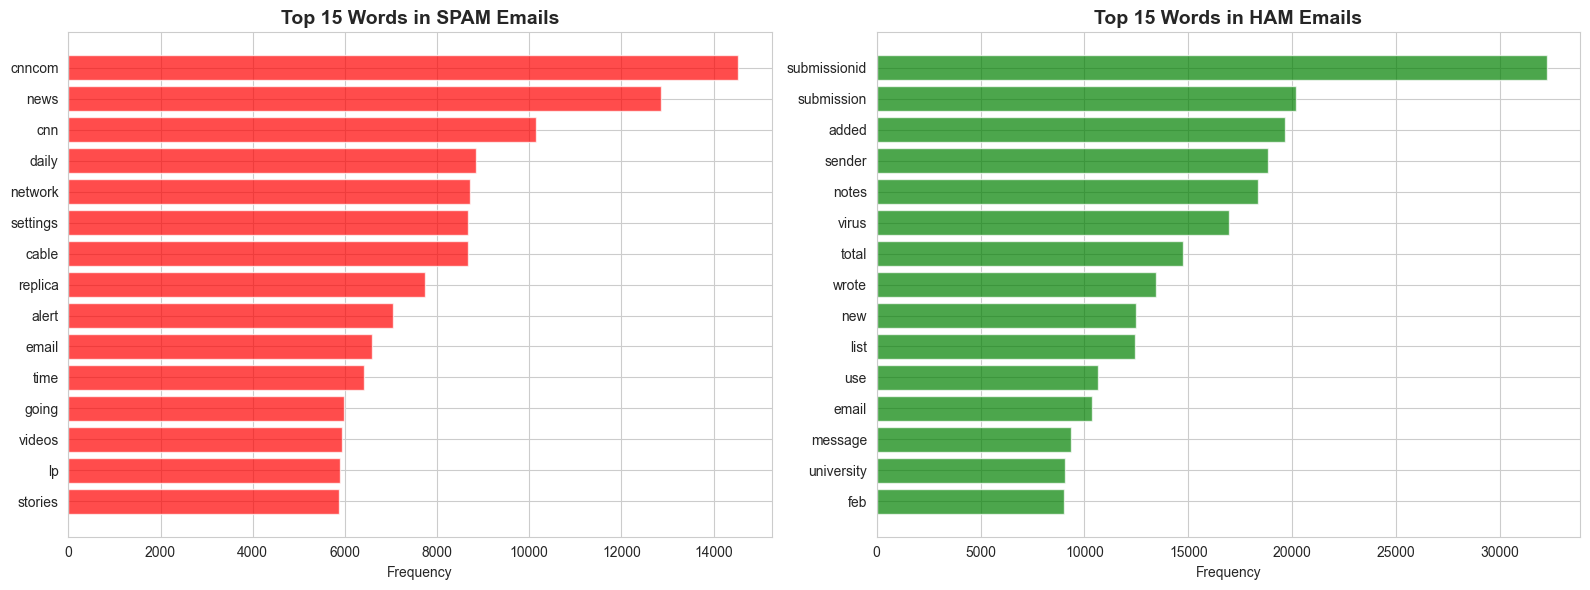

In [25]:
# ==================== STEP 5: FEATURE EXTRACTION ====================
print("\n--- TF-IDF Vectorization ---")

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95, 
                        stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Number of features: {X_tfidf.shape[1]}")

# Get feature names
feature_names = tfidf.get_feature_names_out()
print(f"\nSample features: {feature_names[:20]}")

# Top words in spam and ham
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer(stop_words='english', max_features=n).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

print("\n--- Most Frequent Words ---")
spam_words = get_top_n_words(df[df['label']==1]['cleaned_text'], 15)
ham_words = get_top_n_words(df[df['label']==0]['cleaned_text'], 15)

print("\nTop 15 Spam Words:")
for word, freq in spam_words:
    print(f"{word}: {freq}")

print("\nTop 15 Ham Words:")
for word, freq in ham_words:
    print(f"{word}: {freq}")

# Visualize top words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

spam_words_df = pd.DataFrame(spam_words, columns=['word', 'count'])
ham_words_df = pd.DataFrame(ham_words, columns=['word', 'count'])

ax1.barh(spam_words_df['word'], spam_words_df['count'], color='red', alpha=0.7)
ax1.set_title('Top 15 Words in SPAM Emails', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency')
ax1.invert_yaxis()

ax2.barh(ham_words_df['word'], ham_words_df['count'], color='green', alpha=0.7)
ax2.set_title('Top 15 Words in HAM Emails', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('top_words.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
print("\n" + "="*60)
print("STEP 6: TRAIN-TEST SPLIT")
print("="*60)

X = X_tfidf
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({(X_test.shape[0]/len(df))*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())


STEP 6: TRAIN-TEST SPLIT
Training set size: 31323 (80.0%)
Test set size: 7831 (20.0%)

Training set class distribution:
label
1    17473
0    13850
Name: count, dtype: int64

Test set class distribution:
label
1    4369
0    3462
Name: count, dtype: int64


In [27]:
print("\n" + "="*60)
print("STEP 7: MODEL TRAINING")
print("="*60)

# Dictionary to store models and their results
models = {}
results = {}

# 1. LOGISTIC REGRESSION
print("\n--- Training Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

models['Logistic Regression'] = lr_model

print("Logistic Regression - Training Complete")
print(f"Training Accuracy: {lr_model.score(X_train, y_train)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, lr_pred)*100:.2f}%")

# 2. MULTINOMIAL NAIVE BAYES
print("\n--- Training Multinomial Naive Bayes ---")
mnb_model = MultinomialNB(alpha=1.0)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)
mnb_pred_proba = mnb_model.predict_proba(X_test)[:, 1]

models['Multinomial Naive Bayes'] = mnb_model

print("Multinomial Naive Bayes - Training Complete")
print(f"Training Accuracy: {mnb_model.score(X_train, y_train)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, mnb_pred)*100:.2f}%")


STEP 7: MODEL TRAINING

--- Training Logistic Regression ---
Logistic Regression - Training Complete
Training Accuracy: 99.42%
Test Accuracy: 99.35%

--- Training Multinomial Naive Bayes ---
Multinomial Naive Bayes - Training Complete
Training Accuracy: 95.04%
Test Accuracy: 94.76%


In [28]:
print("\n" + "="*60)
print("STEP 8: MODEL EVALUATION")
print("="*60)

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Evaluate model and return metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"\n{'='*50}")
    print(f"{model_name} - Performance Metrics")
    print(f"{'='*50}")
    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")
    print(f"ROC-AUC:   {roc_auc*100:.2f}%")
    
    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    print(f"\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Ham', 'Spam']))
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Evaluate Logistic Regression
results['Logistic Regression'] = evaluate_model(y_test, lr_pred, lr_pred_proba, 
                                                'Logistic Regression')

# Evaluate Multinomial Naive Bayes
results['Multinomial Naive Bayes'] = evaluate_model(y_test, mnb_pred, mnb_pred_proba, 
                                                     'Multinomial Naive Bayes')



STEP 8: MODEL EVALUATION

Logistic Regression - Performance Metrics
Accuracy:  99.35%
Precision: 99.38%
Recall:    99.45%
F1-Score:  99.42%
ROC-AUC:   99.95%

Confusion Matrix:
[[3435   27]
 [  24 4345]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      3462
        Spam       0.99      0.99      0.99      4369

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831


Multinomial Naive Bayes - Performance Metrics
Accuracy:  94.76%
Precision: 99.72%
Recall:    90.87%
F1-Score:  95.09%
ROC-AUC:   99.82%

Confusion Matrix:
[[3451   11]
 [ 399 3970]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.90      1.00      0.94      3462
        Spam       1.00      0.91      0.95      4369

    accuracy                           0.95      7831
   macro avg       


STEP 9: RESULTS VISUALIZATION

Model Comparison Table:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
    Logistic Regression 99.348742  99.382434 99.450675 99.416543 99.953552
Multinomial Naive Bayes 94.764398  99.723688 90.867475 95.089820 99.815381


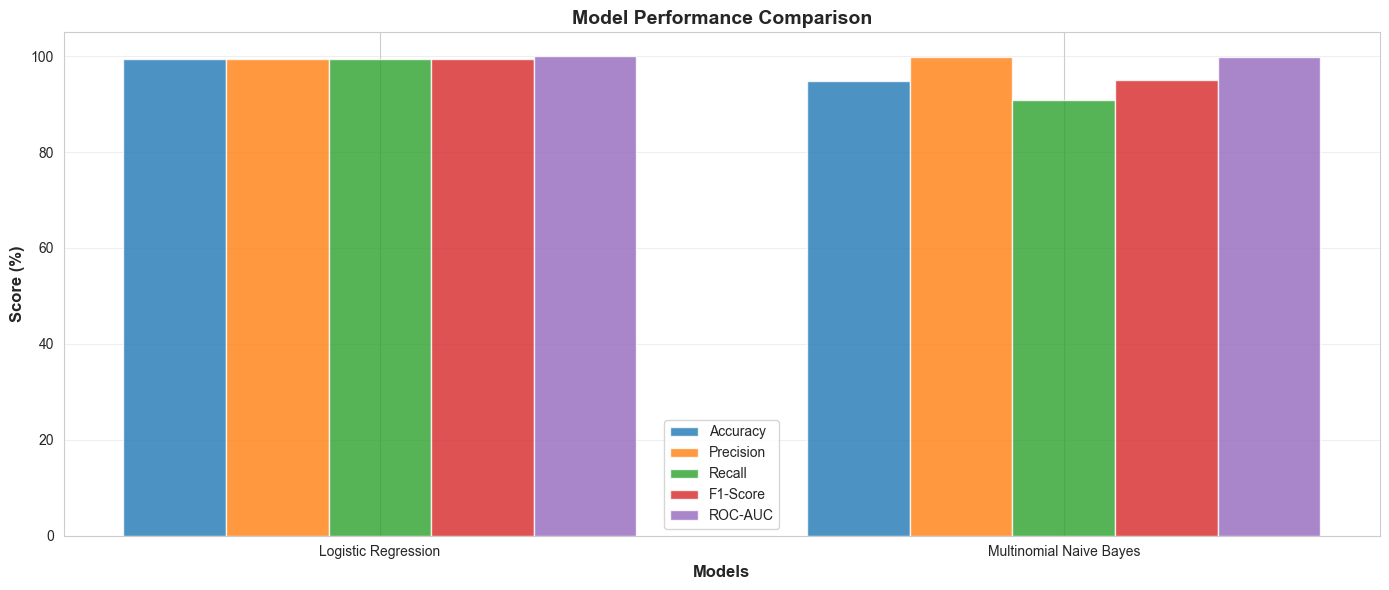

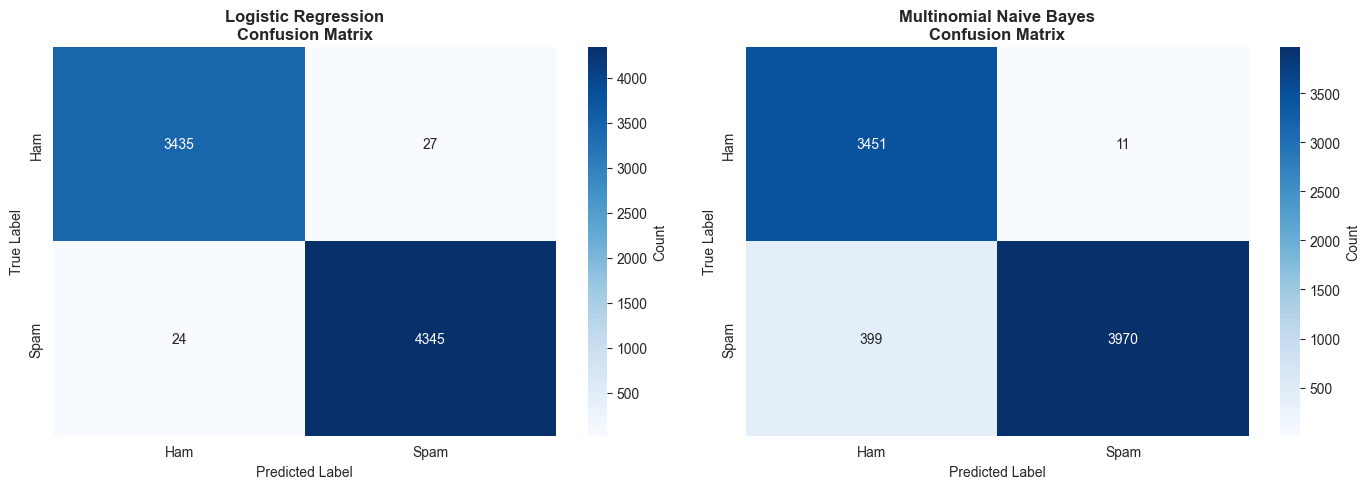

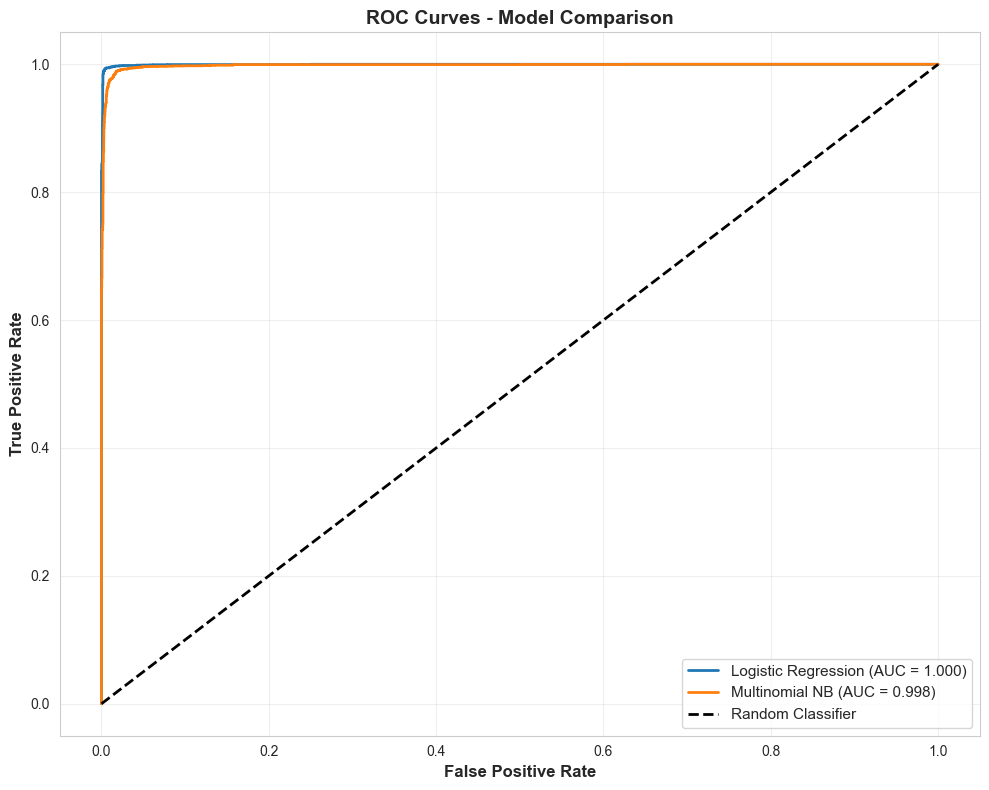

In [29]:
print("\n" + "="*60)
print("STEP 9: RESULTS VISUALIZATION")
print("="*60)

# Model comparison
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy']*100 for m in results],
    'Precision': [results[m]['precision']*100 for m in results],
    'Recall': [results[m]['recall']*100 for m in results],
    'F1-Score': [results[m]['f1']*100 for m in results],
    'ROC-AUC': [results[m]['roc_auc']*100 for m in results]
})

print("\nModel Comparison Table:")
print(metrics_df.to_string(index=False))

# Bar plot comparison
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics_df))
width = 0.15

ax.bar(x - 2*width, metrics_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x - width, metrics_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x, metrics_df['Recall'], width, label='Recall', alpha=0.8)
ax.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax.bar(x + 2*width, metrics_df['ROC-AUC'], width, label='ROC-AUC', alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (model_name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], 
                yticklabels=['Ham', 'Spam'],
                ax=axes[idx], cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{model_name}\nConfusion Matrix', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_pred_proba)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {results["Logistic Regression"]["roc_auc"]:.3f})', 
         linewidth=2)
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial NB (AUC = {results["Multinomial Naive Bayes"]["roc_auc"]:.3f})', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


In [30]:
print("\n" + "="*60)
print("STEP 10: MAKING PREDICTIONS ON NEW EMAIL")
print("="*60)

def predict_email(subject, body, model_name='Logistic Regression'):
    """Predict if an email is spam or ham"""
    # Combine and clean text
    combined = f"{subject} {body}"
    cleaned = clean_text(combined)
    
    # Transform using TF-IDF
    email_tfidf = tfidf.transform([cleaned])
    
    # Get model
    model = models[model_name]
    
    # Predict
    prediction = model.predict(email_tfidf)[0]
    probability = model.predict_proba(email_tfidf)[0]
    
    result = "SPAM" if prediction == 1 else "HAM"
    confidence = probability[prediction] * 100
    
    print(f"\n--- Prediction Results ({model_name}) ---")
    print(f"Email Subject: {subject}")
    print(f"Email Body: {body[:100]}...")
    print(f"\nPrediction: {result}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Spam Probability: {probability[1]*100:.2f}%")
    print(f"Ham Probability: {probability[0]*100:.2f}%")
    
    return result, confidence

# Example predictions
test_emails = [
    {
        'subject': 'Meeting tomorrow at 10 AM',
        'body': 'Hi, just confirming our meeting tomorrow at 10 AM in conference room B.'
    },
    {
        'subject': 'URGENT: You won $1,000,000!!!',
        'body': 'Click here now to claim your prize! Limited time offer. Act now or lose forever!'
    },
    {
        'subject': 'Weekly team update',
        'body': 'Here is the weekly update on our project progress and upcoming milestones.'
    }
]

for email in test_emails:
    predict_email(email['subject'], email['body'], 'Logistic Regression')
    print("\n" + "-"*60)


STEP 10: MAKING PREDICTIONS ON NEW EMAIL

--- Prediction Results (Logistic Regression) ---
Email Subject: Meeting tomorrow at 10 AM
Email Body: Hi, just confirming our meeting tomorrow at 10 AM in conference room B....

Prediction: HAM
Confidence: 67.20%
Spam Probability: 32.80%
Ham Probability: 67.20%

------------------------------------------------------------

--- Prediction Results (Logistic Regression) ---
Email Subject: URGENT: You won $1,000,000!!!
Email Body: Click here now to claim your prize! Limited time offer. Act now or lose forever!...

Prediction: SPAM
Confidence: 95.25%
Spam Probability: 95.25%
Ham Probability: 4.75%

------------------------------------------------------------

--- Prediction Results (Logistic Regression) ---
Email Subject: Weekly team update
Email Body: Here is the weekly update on our project progress and upcoming milestones....

Prediction: HAM
Confidence: 56.69%
Spam Probability: 43.31%
Ham Probability: 56.69%

-----------------------------------

In [31]:

# ==================== STEP 11: SAVE MODEL ====================
print("\n" + "="*60)
print("STEP 11: SAVING MODELS")
print("="*60)

import pickle

# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(mnb_model, f)
print("Naive Bayes model saved as 'naive_bayes_model.pkl'")

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\nSummary:")
print(f"- Total emails analyzed: {len(df)}")
print(f"- Best performing model: {max(results.items(), key=lambda x: x[1]['accuracy'])[0]}")
print(f"- Best accuracy: {max(results.items(), key=lambda x: x[1]['accuracy'])[1]['accuracy']*100:.2f}%")
print("\nGenerated Files:")
print("- class_distribution.png")
print("- feature_distributions.png")
print("- correlation_heatmap.png")
print("- top_words.png")
print("- model_comparison.png")
print("- confusion_matrices.png")
print("- roc_curves.png")
print("- logistic_regression_model.pkl")
print("- naive_bayes_model.pkl")
print("- tfidf_vectorizer.pkl")


STEP 11: SAVING MODELS
Logistic Regression model saved as 'logistic_regression_model.pkl'
Naive Bayes model saved as 'naive_bayes_model.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'

ANALYSIS COMPLETE!

Summary:
- Total emails analyzed: 39154
- Best performing model: Logistic Regression
- Best accuracy: 99.35%

Generated Files:
- class_distribution.png
- feature_distributions.png
- correlation_heatmap.png
- top_words.png
- model_comparison.png
- confusion_matrices.png
- roc_curves.png
- logistic_regression_model.pkl
- naive_bayes_model.pkl
- tfidf_vectorizer.pkl
